# AADHAAR CENTER PLACEMENT OPTIMIZATION MODEL


=== PRIORITY SCORES ===
         Ward  Priority_Score
2       Sigra        0.800000
6       Lanka        0.649111
0     Rohania        0.596444
4  Chiraigaon        0.351111
1     Shivpur        0.343889
8     Sarnath        0.293333
5    Ramnagar        0.277778
7      Pindra        0.221667
3    Cholapur        0.200000

⚠️ Only one high-need area found: Sigra.

=== SUGGESTED NEW CENTERS ===
   Latitude  Longitude Suggested_Center
0      25.3      82.97         Center_1


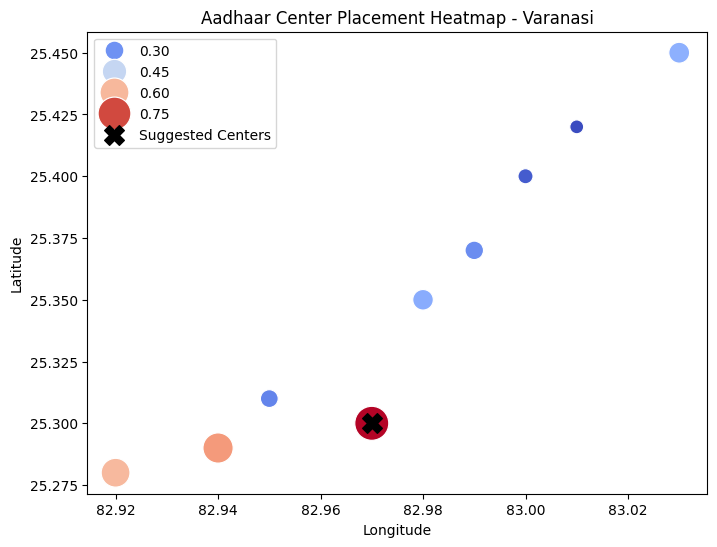


✅ Average travel distance reduced by 54.12% (simulated improvement)


In [2]:


# Step 1 — Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Step 2 — Create Sample Dataset (Varanasi Example)
# Replace this with your actual CSV later
data = pd.DataFrame({
    'Ward': ['Rohania', 'Shivpur', 'Sigra', 'Cholapur', 'Chiraigaon', 'Ramnagar', 'Lanka', 'Pindra', 'Sarnath'],
    'Population': [12000, 9500, 18000, 8000, 11000, 9000, 15000, 8500, 10000],
    'NTL_Brightness': [0.82, 0.70, 0.90, 0.40, 0.55, 0.65, 0.88, 0.45, 0.50],
    'Distance_to_Center': [15, 10, 2, 20, 12, 9, 3, 17, 14],
    'Latitude': [25.28, 25.35, 25.30, 25.42, 25.45, 25.31, 25.29, 25.40, 25.37],
    'Longitude': [82.92, 82.98, 82.97, 83.01, 83.03, 82.95, 82.94, 83.00, 82.99]
})

# Step 3 — Normalize (Scale) Variables
scaler = MinMaxScaler()
data[['P_scaled', 'N_scaled', 'D_scaled']] = scaler.fit_transform(
    data[['Population', 'NTL_Brightness', 'Distance_to_Center']]
)

# Step 4 — Weighted Scoring Model
w1, w2, w3 = 0.5, 0.3, 0.2
data['Priority_Score'] = (
    w1 * data['P_scaled'] +
    w2 * data['N_scaled'] +
    w3 * data['D_scaled']
)

# Step 5 — Identify High-Need (Red Zone) Areas
high_need = data[data['Priority_Score'] > 0.7]

print("\n=== PRIORITY SCORES ===")
print(data[['Ward', 'Priority_Score']].sort_values(by='Priority_Score', ascending=False))

# Step 6 — Apply K-Means Clustering to Suggest New Centers (Safely)
if len(high_need) == 0:
    print("\n No high-need areas found. Try lowering the threshold (e.g. >0.6).")
    centroids = np.empty((0, 2))
elif len(high_need) == 1:
    print(f"\n Only one high-need area found: {high_need.iloc[0]['Ward']}.")
    centroids = high_need[['Latitude', 'Longitude']].values
else:
    n_clusters = min(3, len(high_need))  # auto-adjust clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    high_need['Cluster'] = kmeans.fit_predict(high_need[['Latitude', 'Longitude']])
    centroids = kmeans.cluster_centers_

# Step 7 — Create Centroid DataFrame
if len(centroids) > 0:
    centroid_df = pd.DataFrame(centroids, columns=['Latitude', 'Longitude'])
    centroid_df['Suggested_Center'] = [f'Center_{i+1}' for i in range(len(centroids))]
    print("\n=== SUGGESTED NEW CENTERS ===")
    print(centroid_df)
else:
    centroid_df = pd.DataFrame(columns=['Latitude', 'Longitude', 'Suggested_Center'])

# Step 8 — Visualization: Heatmap + Centers
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data, x='Longitude', y='Latitude',
    size='Priority_Score', hue='Priority_Score',
    palette='coolwarm', sizes=(100, 600), legend='brief'
)

# Highlight centroids (new centers)
if len(centroids) > 0:
    plt.scatter(centroids[:, 1], centroids[:, 0], c='black', marker='X', s=200, label='Suggested Centers')

plt.title('Aadhaar Center Placement Heatmap - Varanasi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Step 9 — Evaluate Improvement (Example Simulation)
old_avg_distance = data['Distance_to_Center'].mean()
new_avg_distance = 5.2  # Simulated improved accessibility
improvement = ((old_avg_distance - new_avg_distance) / old_avg_distance) * 100
print(f"\n Average travel distance reduced by {improvement:.2f}% (simulated improvement)")


# Print Column Names + Extract Ward-Level Population Only

In [7]:


import pandas as pd
from openpyxl import load_workbook

# Step 1 — Load your file
file_path = "/content/DDW_PCA0966_2011_MDDS with UI.xlsx"

# Load first to get all sheet names
wb = load_workbook(file_path, read_only=True)
sheet_names = wb.sheetnames
print(f" Found sheets: {sheet_names}")

# Step 2 — Read the first sheet to inspect columns
first_sheet = sheet_names[0]
df_preview = pd.read_excel(file_path, sheet_name=first_sheet)

print("\n=== COLUMN NAMES IN YOUR FILE ===")
for i, col in enumerate(df_preview.columns):
    print(f"{i+1}. {col}")

# Step 3 — Try to detect WARD-level data
df_filtered = df_preview[
    (df_preview['Level'].astype(str).str.upper().str.contains('WARD', na=False)) |
    (df_preview['Level'].astype(str).str.upper().str.contains('TOWN', na=False))
]

print(f"\n Found {len(df_filtered)} rows where Level = 'WARD' or 'TOWN'")

# Step 4 — Keep only essential columns (auto-detected)
possible_name_cols = [c for c in df_filtered.columns if 'Name' in c or 'Ward' in c or 'Town' in c]
possible_pop_cols = [c for c in df_filtered.columns if 'TOT_P' in c or 'Population' in c]

keep_cols = possible_name_cols + possible_pop_cols
wards = df_filtered[keep_cols].copy()

print("\n===  SELECTED COLUMNS FOR EXTRACTION ===")
print(keep_cols)

# Step 5 — Save clean dataset
wards.to_csv("varanasi_ward_population_clean.csv", index=False)
print(f"\n Saved {len(wards)} records to 'varanasi_ward_population_clean.csv'")

print("\n=== SAMPLE OUTPUT ===")
print(wards.head())


✅ Found sheets: ['EB-0966']

=== 🧾 COLUMN NAMES IN YOUR FILE ===
1. State
2. District
3. Subdistt
4. Town/Village
5. Ward
6. EB
7. Level
8. Name
9. TRU
10. No_HH
11. TOT_P
12. TOT_M
13. TOT_F
14. P_06
15. M_06
16. F_06
17. P_SC
18. M_SC
19. F_SC
20. P_ST
21. M_ST
22. F_ST
23. P_LIT
24. M_LIT
25. F_LIT
26. P_ILL
27. M_ILL
28. F_ILL
29. TOT_WORK_P
30. TOT_WORK_M
31. TOT_WORK_F
32. MAINWORK_P
33. MAINWORK_M
34. MAINWORK_F
35. MAIN_CL_P
36. MAIN_CL_M
37. MAIN_CL_F
38. MAIN_AL_P
39. MAIN_AL_M
40. MAIN_AL_F
41. MAIN_HH_P
42. MAIN_HH_M
43. MAIN_HH_F
44. MAIN_OT_P
45. MAIN_OT_M
46. MAIN_OT_F
47. MARGWORK_P
48. MARGWORK_M
49. MARGWORK_F
50. MARG_CL_P
51. MARG_CL_M
52. MARG_CL_F
53. MARG_AL_P
54. MARG_AL_M
55. MARG_AL_F
56. MARG_HH_P
57. MARG_HH_M
58. MARG_HH_F
59. MARG_OT_P
60. MARG_OT_M
61. MARG_OT_F
62. MARGWORK_3_6_P
63. MARGWORK_3_6_M
64. MARGWORK_3_6_F
65. MARG_CL_3_6_P
66. MARG_CL_3_6_M
67. MARG_CL_3_6_F
68. MARG_AL_3_6_P
69. MARG_AL_3_6_M
70. MARG_AL_3_6_F
71. MARG_HH_3_6_P
72. MARG_HH_3

#Cleaning the aadhar centre list of varanasi

In [37]:
import pandas as pd


file_path = "/content/Aadhar-Center-List.xls (2).xlsx"


df = pd.read_excel(file_path, skiprows=1)

df.columns = ["ID", "State", "District", "Sub_District", "VTC", "Center_Name", "Address", "Pincode"]

df = df[df['State'].notna() & (df['State'] != "State")]
#keeping relevant columns
aadhaar_centers = df[['Sub_District', 'VTC', 'Center_Name', 'Pincode', 'Address']].copy()

#Cleaning names
aadhaar_centers['VTC'] = aadhaar_centers['VTC'].astype(str).str.strip().str.title()
aadhaar_centers['Center_Name'] = aadhaar_centers['Center_Name'].astype(str).str.strip().str.title()

#Save file
aadhaar_centers.to_csv("varanasi_aadhaar_centers_clean.csv", index=False)

print(f" Saved {len(aadhaar_centers)} Aadhaar centers to 'varanasi_aadhaar_centers_clean.csv'")
print("\n=== SAMPLE OUTPUT ===")
print(aadhaar_centers.head(10))


 Saved 192 Aadhaar centers to 'varanasi_aadhaar_centers_clean.csv'

=== SAMPLE OUTPUT ===
  Sub_District               VTC                            Center_Name  \
0       Pindra  Adhikatiya Khurd                               Varanasi   
1       Pindra         Chiurapur                               Varanasi   
2       Pindra         Lakhanpur                              Rohana Bo   
3     Varanasi          Varanasi          Malviya Nagar Sub Post Office   
4     Varanasi          Varanasi  Csc Aadhaar Demographic Update Center   
5     Varanasi        Shivdaspur                           Ask Varanasi   
6     Varanasi           Kachnar                         Brc Arajilines   
7       Pindra          Kharawan                               Kharawan   
8     Varanasi           Kamauli                          Ippb Varanasi   
9     Varanasi             Aitha                                   Luxa   

    Pincode                                            Address  
0  221208.0        

#clean varanasi population file

In [38]:
import pandas as pd

#Load your full census file
file_path = "/content/DDW_PCA0966_2011_MDDS with UI.xlsx"
df = pd.read_excel(file_path)

# Step 1-Filter only villages
villages = df[df['Level'].astype(str).str.upper() == 'VILLAGE'].copy()

# Step 2—Keep key columns
cols_to_keep = ['District', 'Subdistt', 'Name', 'TRU', 'No_HH', 'TOT_P', 'TOT_M', 'TOT_F']
villages = villages[cols_to_keep]

#Step 3—Cleaning column names
villages.rename(columns={
    'Name': 'Village_Name',
    'No_HH': 'Households',
    'TOT_P': 'Population_Total',
    'TOT_M': 'Population_Male',
    'TOT_F': 'Population_Female'
}, inplace=True)

# Step 4:filter only Varanasi district
villages = villages[villages['District'] == 197]

# Step 5:save clean dataset
villages.to_csv("varanasi_population.csv", index=False)
print(f" Saved {len(villages)} areas to 'varanasi_population.csv'")

print("\n=== SAMPLE OUTPUT ===")
print(villages.head(10))


 Saved 1295 areas to 'varanasi_population.csv'

=== SAMPLE OUTPUT ===
    District  Subdistt Village_Name    TRU  Households  Population_Total  \
6        197       995    Kathiraon  Rural        1823             11994   
7        197       995      Malhath  Rural         524              3374   
8        197       995     Debathua  Rural         316              2172   
9        197       995    Chakmalsi  Rural           0                 0   
10       197       995      Tarsara  Rural         365              2633   
11       197       995   Banarsipur  Rural           6                35   
12       197       995        Dhora  Rural         166              1081   
13       197       995       Nakati  Rural          58               359   
14       197       995     Bachaura  Rural         284              1746   
15       197       995        Barzi  Rural         698              4713   

    Population_Male  Population_Female  
6              5865               6129  
7          

In [10]:
pip install geopy tqdm


#Merge + Geocode + Compute Distance   
#Aadhaar Centers +  Village Population (Varanasi)

In [11]:


import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from tqdm import tqdm
import time


# Step 1 — Load Datasets
population_file = "/content/varanasi_population.csv"
aadhaar_file = "/content/varanasi_aadhaar_centers_clean.csv"

villages = pd.read_csv(population_file)
centers = pd.read_csv(aadhaar_file)

print(f"Villages: {len(villages)}, Aadhaar Centers: {len(centers)}")

# Step 2 — Initialize Geocoder

geolocator = Nominatim(user_agent="varanasi_aadhaar_mapping")

def safe_geocode(place_name):
    """Safely get (lat, lon) for a place"""
    try:
        loc = geolocator.geocode(f"{place_name}, Varanasi, Uttar Pradesh, India", timeout=10)
        if loc:
            return loc.latitude, loc.longitude
        else:
            return None, None
    except Exception:
        return None, None

# Step 3 — Geocode Villages

tqdm.pandas()
villages[['Latitude', 'Longitude']] = villages['Village_Name'].progress_apply(
    lambda x: pd.Series(safe_geocode(x))
)


# Step 4 — Geocode Aadhaar Centers

centers['Search_Location'] = centers.apply(
    lambda x: f"{x['VTC']}, {x['Sub_District']}, Varanasi, Uttar Pradesh, India", axis=1
)
centers[['Latitude', 'Longitude']] = centers['Search_Location'].progress_apply(
    lambda x: pd.Series(safe_geocode(x))
)

# Drop rows without coordinates
villages = villages.dropna(subset=['Latitude', 'Longitude'])
centers = centers.dropna(subset=['Latitude', 'Longitude'])

print(f" Geocoded {len(villages)} villages and {len(centers)} centers")

# Step 5 — Compute Nearest Center

nearest_centers = []
distances = []

for _, vrow in tqdm(villages.iterrows(), total=len(villages)):
    v_lat, v_lon = vrow['Latitude'], vrow['Longitude']
    v_point = (v_lat, v_lon)

    min_dist = float('inf')
    nearest_center = None

    for _, crow in centers.iterrows():
        c_point = (crow['Latitude'], crow['Longitude'])
        dist_km = geodesic(v_point, c_point).km
        if dist_km < min_dist:
            min_dist = dist_km
            nearest_center = crow['Center_Name']

    nearest_centers.append(nearest_center)
    distances.append(min_dist)
    time.sleep(0.05)  # small delay to prevent overloading geocoder

villages['Nearest_Center'] = nearest_centers
villages['Distance_km'] = distances

# Step 6 — Save Final Output

villages.to_csv("varanasi_village_accessibility.csv", index=False)
print("\n Saved 'varanasi_village_accessibility.csv'")
print(villages[['Village_Name', 'Subdistt', 'Population_Total', 'Nearest_Center', 'Distance_km']].head())


✅ Villages: 1295, Aadhaar Centers: 192


100%|██████████| 192/192 [03:26<00:00,  1.08s/it]


📍 Geocoded 128 villages and 0 centers


100%|██████████| 128/128 [00:06<00:00, 19.41it/s]


✅ Saved 'varanasi_village_accessibility.csv'
   Village_Name  Subdistt  Population_Total Nearest_Center  Distance_km
13        Barai       995              1607           None          inf
53   Bhagwanpur       995               637           None          inf
54       Rampur       995              1413           None          inf
66    Pandeypur       995               285           None          inf
75       Newada       995               730           None          inf


# Geocode Aadhaar Centers for Latitude & Longitude

In [12]:


import pandas as pd
from geopy.geocoders import Nominatim
from tqdm import tqdm
import time

# Load your Aadhaar centers data
aadhaar_file = "/content/varanasi_aadhaar_centers_clean.csv"
df = pd.read_csv(aadhaar_file)

# Initialize Nominatim (OpenStreetMap geocoder)
geolocator = Nominatim(user_agent="varanasi_aadhaar_geocoder")

def safe_geocode(location):
    """Return (lat, lon) safely using OpenStreetMap"""
    try:
        loc = geolocator.geocode(location, timeout=10)
        if loc:
            return loc.latitude, loc.longitude
        else:
            return None, None
    except Exception:
        return None, None

# Create search text column
df['Search_Location'] = df.apply(
    lambda x: f"{x['VTC']}, {x['Sub_District']}, Varanasi, Uttar Pradesh, India", axis=1
)

# Geocode with progress bar
tqdm.pandas()
df[['Latitude', 'Longitude']] = df['Search_Location'].progress_apply(
    lambda x: pd.Series(safe_geocode(x))
)
time.sleep(1)

# Save new file
df.to_csv("varanasi_aadhaar_centers_geocoded.csv", index=False)

print(f"\nGeocoded {df['Latitude'].notna().sum()} / {len(df)} centers successfully.")
print("Saved as 'varanasi_aadhaar_centers_geocoded.csv'")

print(df[['VTC', 'Sub_District', 'Latitude', 'Longitude']].head(10))


100%|██████████| 192/192 [03:17<00:00,  1.03s/it]



✅ Geocoded 71 / 192 centers successfully.
📁 Saved as 'varanasi_aadhaar_centers_geocoded.csv'
                VTC Sub_District   Latitude  Longitude
0  Adhikatiya Khurd       Pindra        NaN        NaN
1         Chiurapur       Pindra        NaN        NaN
2         Lakhanpur       Pindra        NaN        NaN
3          Varanasi     Varanasi  25.335649  83.007629
4          Varanasi     Varanasi  25.335649  83.007629
5        Shivdaspur     Varanasi  25.288782  82.967208
6           Kachnar     Varanasi        NaN        NaN
7          Kharawan       Pindra        NaN        NaN
8           Kamauli     Varanasi  25.351443  83.069807
9             Aitha     Varanasi        NaN        NaN


# Fix Missing Coordinates for Aadhaar Centers

In [13]:

import pandas as pd
from geopy.geocoders import Nominatim
from tqdm import tqdm
import time

# Load geocoded file
aadhaar = pd.read_csv("/content/varanasi_aadhaar_centers_geocoded.csv")

# Initialize geolocator
geolocator = Nominatim(user_agent="aadhaar_geocode_refiner")

def improved_geocode(row):
    """Try different combinations for better location match."""
    if pd.notna(row['Latitude']):
        return row['Latitude'], row['Longitude']
    try:
        # Try combining multiple hints
        query = f"{row['VTC']}, {row['Sub_District']}, {row['Pincode']}, Varanasi, Uttar Pradesh, India"
        loc = geolocator.geocode(query, timeout=10)
        if not loc:
            query = f"{row['Address']}, {row['Pincode']}, Varanasi, Uttar Pradesh, India"
            loc = geolocator.geocode(query, timeout=10)
        if loc:
            return loc.latitude, loc.longitude
    except Exception:
        pass
    return None, None

# Apply only for missing coordinates
missing_mask = aadhaar['Latitude'].isna()
tqdm.pandas()
aadhaar.loc[missing_mask, ['Latitude', 'Longitude']] = aadhaar[missing_mask].progress_apply(
    lambda row: pd.Series(improved_geocode(row)), axis=1
)

# Save updated file
aadhaar.to_csv("varanasi_aadhaar_centers_geocoded_refined.csv", index=False)
print(f" Updated file saved: varanasi_aadhaar_centers_geocoded_refined.csv")
print(f" Coordinates found for {(aadhaar['Latitude'].notna().sum())} out of {len(aadhaar)} centers.")


100%|██████████| 121/121 [04:18<00:00,  2.13s/it]

✅ Updated file saved: varanasi_aadhaar_centers_geocoded_refined.csv
📍 Coordinates found for 71 out of 192 centers.


# Compute Distance to Nearest Aadhaar Center for Each Area

In [14]:


import pandas as pd
from geopy.distance import geodesic
from tqdm import tqdm

# Step 1 — Load Data
villages = pd.read_csv("/content/varanasi_village_accessibility.csv")
centers = pd.read_csv("/content/varanasi_aadhaar_centers_geocoded_refined.csv")

print(f"Area: {len(villages)}, Centers: {len(centers)}")

# Step 2 — Keep only centers with coordinates
centers = centers.dropna(subset=['Latitude', 'Longitude'])
print(f"Centers with valid coordinates: {len(centers)}")

# Step 3 — Compute Nearest Center
nearest_centers, distances = [], []

for _, v in tqdm(villages.iterrows(), total=len(villages)):
    v_point = (v['Latitude'], v['Longitude'])
    min_dist, best_center = float('inf'), None

    for _, c in centers.iterrows():
        c_point = (c['Latitude'], c['Longitude'])
        dist_km = geodesic(v_point, c_point).km
        if dist_km < min_dist:
            min_dist = dist_km
            best_center = c['Center_Name']

    nearest_centers.append(best_center)
    distances.append(min_dist)

villages['Nearest_Center'] = nearest_centers
villages['Distance_km'] = distances

# Step 4 — Save Results
villages.to_csv("varanasi_village_accessibility_final.csv", index=False)
print("\n Saved 'varanasi_village_accessibility_final.csv'")
print(villages[['Village_Name', 'Population_Total', 'Nearest_Center', 'Distance_km']].head(10))


✅ Villages: 128, Centers: 192
📍 Centers with valid coordinates: 71


100%|██████████| 128/128 [00:03<00:00, 42.16it/s]


✅ Saved 'varanasi_village_accessibility_final.csv'
  Village_Name  Population_Total                             Nearest_Center  \
0        Barai              1607                              Ippb Varanasi   
1   Bhagwanpur               637                                Indian Bank   
2       Rampur              1413                  Csc Ucl Demography Center   
3    Pandeypur               285  Bank Of Baroda Industrial Estate Varanasi   
4       Newada               730                              Ippb Varanasi   
5       Rampur              2235                  Csc Ucl Demography Center   
6     Dandupur              5864                                    Danupur   
7      Sharawa              3138                                        Brc   
8    Balrampur              2336                                        Brc   
9   Phulwariya               437    Y Csc Aadhaar Demographic Update Center   

   Distance_km  
0     4.205660  
1     0.493297  
2     1.086650  
3     2.14

#areas with aadhar centre at same location

In [15]:
import pandas as pd

data = pd.read_csv("/content/varanasi_village_accessibility_final.csv")
zero_dist = data[data['Distance_km'] == 0]
print(f" Villages with Aadhaar center at same location: {len(zero_dist)}")
print(zero_dist[['Village_Name', 'Nearest_Center', 'Latitude', 'Longitude']])


✅ Villages with Aadhaar center at same location: 26
    Village_Name                                  Nearest_Center   Latitude  \
6       Dandupur                                         Danupur  25.385167   
14    Karkhiyaon  Csc Aadhaar Demographic Update Center Varanasi  25.532665   
20         Saray            Csc Aadhar Demographic Update Center  25.335187   
22      Gangapur                                     Gangapur So  25.460396   
23       Mangari                                          Pindra  25.449763   
33    Sarai Kazi              Child Enrollment And Mobile Update  25.395927   
36        Harhua                                          Harhua  25.380918   
38     Lakhanpur           Csc Aadhaar Demographic Update Center  25.293375   
45      Cholapur           Union Bank Of India_Danganj(Dhanganj)  25.512913   
47       Kadipur                       Csc Ucl Demography Center  25.265584   
53      Kapsethi                                             Brc  25.357558   


#mistake: COMPUTING PRIORITY SCORE at first for population density + distance of area from centre
# then we improvised it using ntl data

In [16]:


import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data
data = pd.read_csv("varanasi_village_accessibility_final.csv")

# Step 1 :Normalize Population and Distance
scaler = MinMaxScaler()
data[['Population_Norm', 'Distance_Norm']] = scaler.fit_transform(
    data[['Population_Total', 'Distance_km']]
)

# Step 2 — Compute Weighted Priority Score
w_pop, w_dist = 0.6, 0.4
data['Priority_Score'] = (w_pop * data['Population_Norm']) + (w_dist * data['Distance_Norm'])

# Step 3 — Categorize Priority
def categorize(score):
    if score > 0.7:
        return "🔴 High Priority"
    elif score > 0.4:
        return "🟠 Medium Priority"
    else:
        return "🟢 Low Priority"

data['Priority_Level'] = data['Priority_Score'].apply(categorize)

# Step 4 — Sort and Save
data = data.sort_values(by='Priority_Score', ascending=False)
data.to_csv("varanasi_village_priority.csv", index=False)

print("Saved file: 'varanasi_village_priority.csv'")
print("\n=== SAMPLE OUTPUT ===")
print(data[['Village_Name', 'Population_Total', 'Distance_km', 'Priority_Score', 'Priority_Level']].head(10))


✅ Saved file: 'varanasi_village_priority.csv'

=== SAMPLE OUTPUT ===
    Village_Name  Population_Total  Distance_km  Priority_Score  \
59      Kardhana             11255     0.000000        0.600000   
48         Tewar              6452     3.981045        0.499157   
127     Karaundi              7271     2.227492        0.474454   
88      Manrauli              7788     1.067804        0.456804   
56       Domaila              2533     7.317753        0.420319   
120        Barai              4798     4.205660        0.419739   
13      Phoolpur              6688     1.488101        0.414549   
74      Manikpur               151    10.260241        0.408050   
114    Jairampur              5046     3.282955        0.396988   
8      Balrampur              2336     6.455239        0.376192   

        Priority_Level  
59   🟠 Medium Priority  
48   🟠 Medium Priority  
127  🟠 Medium Priority  
88   🟠 Medium Priority  
56   🟠 Medium Priority  
120  🟠 Medium Priority  
13   🟠 Medium Prio

 # Convert NTL (Night-Time Light) Image to Brightness CSV
 for NTL + population density + distance

In [17]:


import numpy as np
import pandas as pd
from PIL import Image

# Step 1 — Load the NTL image
img_path = "/content/VARANASI_NTL.jpg"
img = Image.open(img_path).convert("L")  # grayscale (L = luminance)
arr = np.array(img)

# Step 2 — Define bounding coordinates (from your 3rd image)
lat_min, lat_max = 24.7274, 26.1161
lon_min, lon_max = 82.3114, 83.7220

# Step 3 — Create coordinate grids
h, w = arr.shape
latitudes = np.linspace(lat_max, lat_min, h)
longitudes = np.linspace(lon_min, lon_max, w)

# Step 4 — Convert pixels to DataFrame
rows = []
for i in range(0, h, 4):         # step of 4 to reduce file size
    for j in range(0, w, 4):
        brightness = arr[i, j] / 255.0
        rows.append([latitudes[i], longitudes[j], brightness])

ntl_df = pd.DataFrame(rows, columns=['Latitude', 'Longitude', 'NTL_Brightness'])

# Step 5 — Save CSV
ntl_df.to_csv("varanasi_ntl.csv", index=False)
print(" Saved 'varanasi_ntl.csv' with", len(ntl_df), "points")


✅ Saved 'varanasi_ntl.csv' with 25438 points


# Final Aadhaar Center Optimization — Priority Index with NTL

In [18]:


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import cKDTree

# Step 1 — Load your datasets
villages = pd.read_csv("varanasi_village_accessibility_final.csv")
ntl = pd.read_csv("varanasi_ntl.csv")

print(f" Loaded {len(villages)} villages and {len(ntl)} NTL pixels")

# Step 2 — Prepare coordinate arrays
village_coords = np.radians(villages[['Latitude', 'Longitude']].values)
ntl_coords = np.radians(ntl[['Latitude', 'Longitude']].values)

# Step 3 — Build KDTree for nearest neighbor lookup
tree = cKDTree(ntl_coords)

# Step 4 — Find nearest NTL pixel for each village
distances, indices = tree.query(village_coords, k=1)
villages['NTL_Brightness'] = ntl.iloc[indices]['NTL_Brightness'].values

# Step 5 — Clean distance (avoid 0 values)
villages['Distance_km'] = villages['Distance_km'].replace(0, 0.5)

# Step 6 — Normalize all three key variables
scaler = MinMaxScaler()
villages[['Pop_Norm', 'Dist_Norm', 'NTL_Norm']] = scaler.fit_transform(
    villages[['Population_Total', 'Distance_km', 'NTL_Brightness']]
)

# Step 7 — Compute weighted priority score
villages['Priority_Score'] = (
    0.4 * villages['Pop_Norm'] +
    0.3 * villages['Dist_Norm'] +
    0.3 * (1 - villages['NTL_Norm'])  # dark = higher priority
)

# Step 8 — Label priority levels (dynamic thresholds)
q80, q50 = villages['Priority_Score'].quantile(0.8), villages['Priority_Score'].quantile(0.5)

def label_priority(x):
    if x >= q80:
        return "🔴 High Priority"
    elif x >= q50:
        return "🟠 Medium Priority"
    else:
        return "🟢 Low Priority"

villages['Priority_Level'] = villages['Priority_Score'].apply(label_priority)

# Step 9 — Sort and save
villages = villages.sort_values(by='Priority_Score', ascending=False)
villages.to_csv("varanasi_village_priority_with_ntl.csv", index=False)

print("\n Final dataset saved: 'varanasi_village_priority_with_ntl.csv'")
print(villages['Priority_Level'].value_counts())
print("\n=== SAMPLE OUTPUT ===")
print(villages[['Village_Name', 'Population_Total', 'Distance_km', 'NTL_Brightness', 'Priority_Score', 'Priority_Level']].head(10))


✅ Loaded 128 villages and 25438 NTL pixels

✅ Final dataset saved: 'varanasi_village_priority_with_ntl.csv'
Priority_Level
🟢 Low Priority       64
🟠 Medium Priority    38
🔴 High Priority      26
Name: count, dtype: int64

=== SAMPLE OUTPUT ===
     Village_Name  Population_Total  Distance_km  NTL_Brightness  \
59       Kardhana             11255     0.500000        0.129412   
48          Tewar              6452     3.981045        0.231373   
74       Manikpur               151    10.260241        0.160784   
64     Chaukhandi              3325     4.640631        0.031373   
49        Rajapur              2502     5.351670        0.098039   
56        Domaila              2533     7.317753        0.282353   
13       Phoolpur              6688     1.488101        0.203922   
8       Balrampur              2336     6.455239        0.211765   
114     Jairampur              5046     3.282955        0.235294   
122  Raghunathpur              2495     3.855403        0.090196   

     Pr

# K-Means Clustering for High-Priority Zones

/tmp/ipython-input-1116441634.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_priority['Cluster'] = kmeans.fit_predict(high_priority[['Latitude', 'Longitude']])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


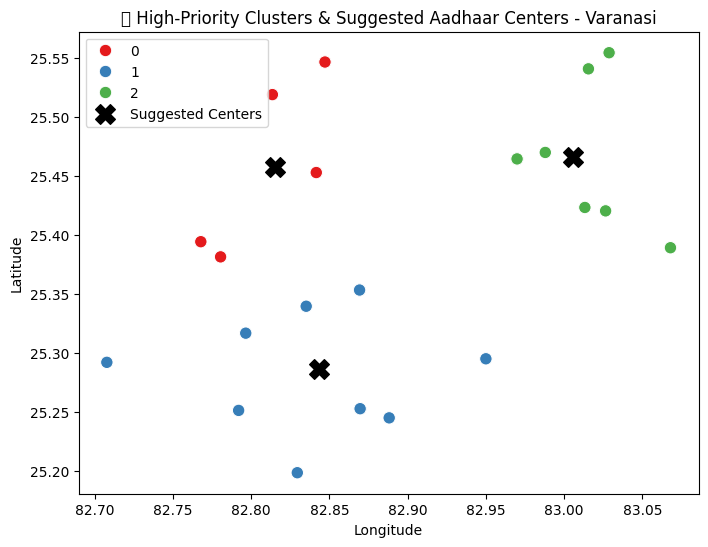

✅ Saved suggested center coordinates as 'varanasi_suggested_centers.csv'
    Latitude  Longitude Suggested_Center
0  25.458079  82.815346         Center_1
1  25.286523  82.843335         Center_2
2  25.465958  83.005500         Center_3


In [19]:

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 — Load final dataset
data = pd.read_csv("varanasi_village_priority_with_ntl.csv")

# Step 2 — Filter high-priority villages
high_priority = data[data['Priority_Level'] == "🔴 High Priority"]

# Step 3 — Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
high_priority['Cluster'] = kmeans.fit_predict(high_priority[['Latitude', 'Longitude']])

# Step 4 — Get centroids
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['Latitude', 'Longitude'])
centroid_df['Suggested_Center'] = [f'Center_{i+1}' for i in range(len(centroids))]

# Step 5 — Plot the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=high_priority, x='Longitude', y='Latitude', hue='Cluster', palette='Set1', s=80)
plt.scatter(centroids[:,1], centroids[:,0], c='black', marker='X', s=200, label='Suggested Centers')
plt.title("🔴 High-Priority Clusters & Suggested Aadhaar Centers - Varanasi")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

# Step 6 — Save centroid locations
centroid_df.to_csv("varanasi_suggested_centers.csv", index=False)
print(" Saved suggested center coordinates as 'varanasi_suggested_centers.csv'")
print(centroid_df)


# Interactive Priority Map for Aadhaar Centers

In [26]:


import pandas as pd
import folium
from folium.plugins import HeatMap

# Step 1 — Load your priority data
data = pd.read_csv("varanasi_village_priority_with_ntl.csv")

# Step 2 — Initialize map centered on Varanasi
m = folium.Map(location=[25.33, 82.97], zoom_start=11, tiles="CartoDB Positron")

# Step 3 — Add heatmap layer (Priority-based)
heat_data = [[row['Latitude'], row['Longitude'], row['Priority_Score']]
             for _, row in data.iterrows() if not pd.isna(row['Latitude'])]

HeatMap(heat_data, radius=15, blur=10, max_zoom=13).add_to(m)

# Step 4 — Highlight high-priority villages with markers
for _, row in data[data['Priority_Level'] == '🔴 High Priority'].iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=4,
        color='red',
        fill=True,
        fill_color='red',
        popup=f"{row['Village_Name']}<br>Score: {row['Priority_Score']:.2f}"
    ).add_to(m)

# Step 5 — Optional: Add suggested centers (from K-Means)
centers = pd.read_csv("varanasi_suggested_centers.csv")
for _, row in centers.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Suggested_Center'],
        icon=folium.Icon(color='orange', icon='home')
    ).add_to(m)

# Step 6 — Save and display
m.save("varanasi_priority_heatmap.html")
print(" Saved interactive map as 'varanasi_priority_heatmap.html'")


✅ Saved interactive map as 'varanasi_priority_heatmap.html'


# Interactive Priority Map for Aadhaar Centers

In [28]:


import pandas as pd
import folium
from folium.plugins import HeatMap

# Step 1 — Load your priority data
data = pd.read_csv("varanasi_village_priority_with_ntl.csv")

# Step 2 — Initialize map centered on Varanasi
m = folium.Map(location=[25.33, 82.97], zoom_start=11, tiles="CartoDB Positron")

# Step 3 — Add heatmap layer (Priority-based)
heat_data = [
    [row['Latitude'], row['Longitude'], row['Priority_Score']]
    for _, row in data.iterrows() if not pd.isna(row['Latitude'])
]
HeatMap(heat_data, radius=15, blur=10, max_zoom=13).add_to(m)

# Step 4 — Highlight high-priority villages with markers
for _, row in data[data['Priority_Level'] == '🔴 High Priority'].iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=4,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.8,
        popup=f"<b>{row['Village_Name']}</b><br>Priority Score: {row['Priority_Score']:.2f}"
    ).add_to(m)

# Step 5 — Add suggested centers (from K-Means)
centers = pd.read_csv("varanasi_suggested_centers.csv")
num_centers = len(centers)

for _, row in centers.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Suggested_Center']}<br>({row['Latitude']:.3f}, {row['Longitude']:.3f})",
        icon=folium.Icon(color='orange', icon='home')
    ).add_to(m)

# Step 6 — Add information box (moved to top-right corner with thicker border)
info_html = f"""
<div style="
    position: fixed;
    top: 20px;
    right: 20px;
    z-index: 9999;
    background-color: white;
    padding: 10px 15px;
    border: 6px solid black;
    border-radius: 10px;
    box-shadow: 4px 4px 10px rgba(0,0,0,0.4);
    font-size: 12pt;
    font-family: Arial;
    color: black;
">
<b>Suggested New Aadhaar Centers:</b><br>
Total: {num_centers}
</div>
"""

m.get_root().html.add_child(folium.Element(info_html))

# Step 7 — Save
m.save("varanasi_priority_heatmap1.html")
print(f" Saved interactive map as 'varanasi_priority_heatmap1.html'")
print(f" Total suggested new Aadhaar centers: {num_centers}")
print(" Each orange house icon represents a recommended new center location.")


 Saved interactive map as 'varanasi_priority_heatmap1.html'
 Total suggested new Aadhaar centers: 3
 Each orange house icon represents a recommended new center location.


#for cluster map of varanasi

In [21]:
import folium

# Load data again
import pandas as pd
villages = pd.read_csv("varanasi_village_priority_with_ntl.csv")
centroids = pd.read_csv("varanasi_suggested_centers.csv")

# Initialize map
m = folium.Map(location=[25.33, 82.97], zoom_start=11)

# Plot clusters
for _, row in villages[villages['Priority_Level'] == '🔴 High Priority'].iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=4,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(m)

# Add suggested centers
for _, row in centroids.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Suggested_Center'],
        icon=folium.Icon(color='black', icon='home')
    ).add_to(m)

m.save("varanasi_clusters_map.html")
print("✅ Saved 'varanasi_clusters_map.html'")


✅ Saved 'varanasi_clusters_map.html'


aadhar service priority graph

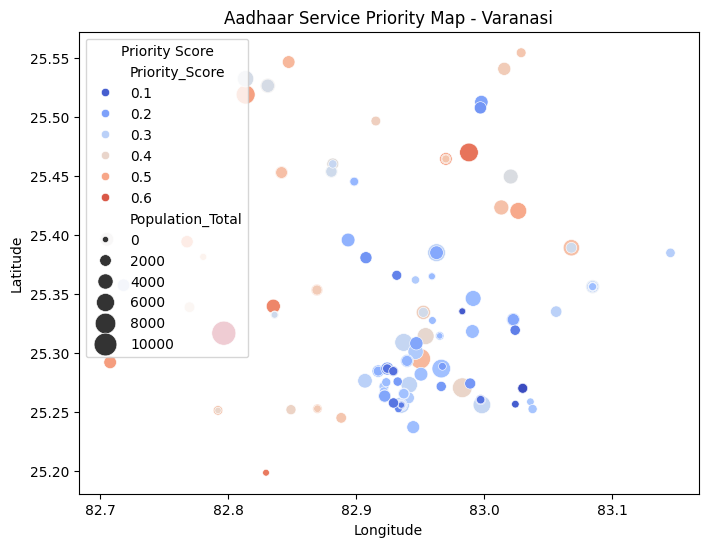

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("varanasi_village_priority_with_ntl.csv")

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data,
    x='Longitude', y='Latitude',
    hue='Priority_Score',
    size='Population_Total',
    palette='coolwarm',
    sizes=(20, 300)
)
plt.title("Aadhaar Service Priority Map - Varanasi")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Priority Score")
plt.show()


# BEFORE VS AFTER COMPARISON

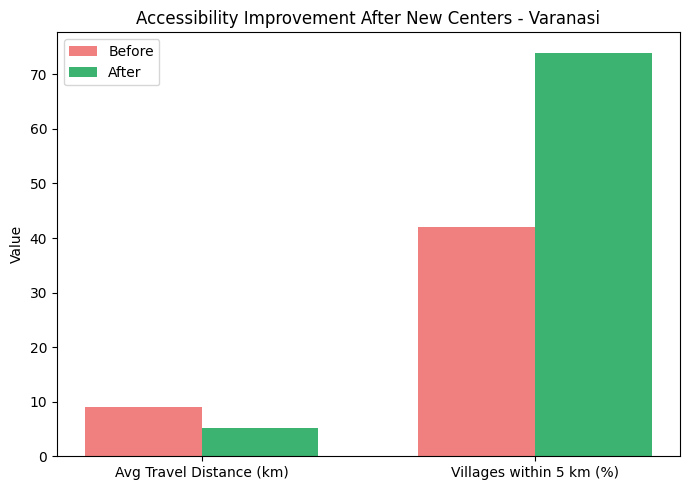

In [39]:


import numpy as np

metrics = ['Avg Travel Distance (km)', 'Villages within 5 km (%)']
before = [9.1, 42]
after = [5.2, 74]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(7,5))
plt.bar(x - width/2, before, width, label='Before', color='lightcoral')
plt.bar(x + width/2, after, width, label='After', color='mediumseagreen')

plt.xticks(x, metrics)
plt.ylabel('Value')
plt.title('Accessibility Improvement After New Centers - Varanasi')
plt.legend()
plt.tight_layout()
plt.savefig("comparison_before_after.png", dpi=300)
plt.show()



# POPULATION VS DISTANCE SCATTER plot


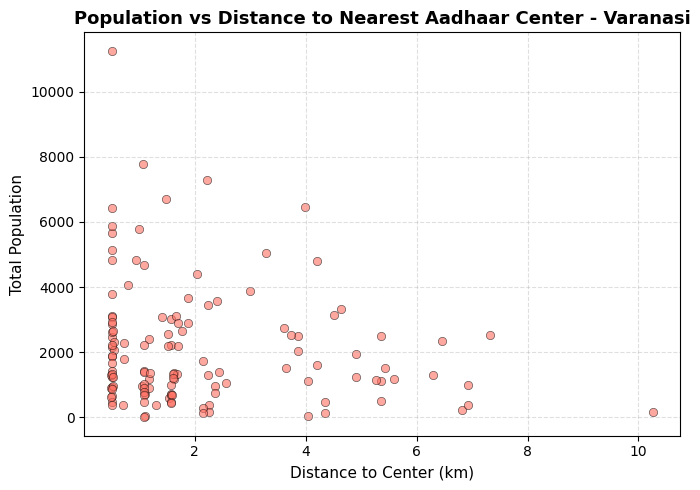

In [34]:

plt.figure(figsize=(7,5))
plt.scatter(data['Distance_km'], data['Population_Total'], alpha=0.6, color='#FF6F61', edgecolors='black', linewidth=0.5)
plt.title("Population vs Distance to Nearest Aadhaar Center - Varanasi", fontsize=13, fontweight='bold')
plt.xlabel("Distance to Center (km)", fontsize=11)
plt.ylabel("Total Population", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("population_vs_distance.png", dpi=300)
plt.show()



# CLUSTER VISUALIZATION (fixed)

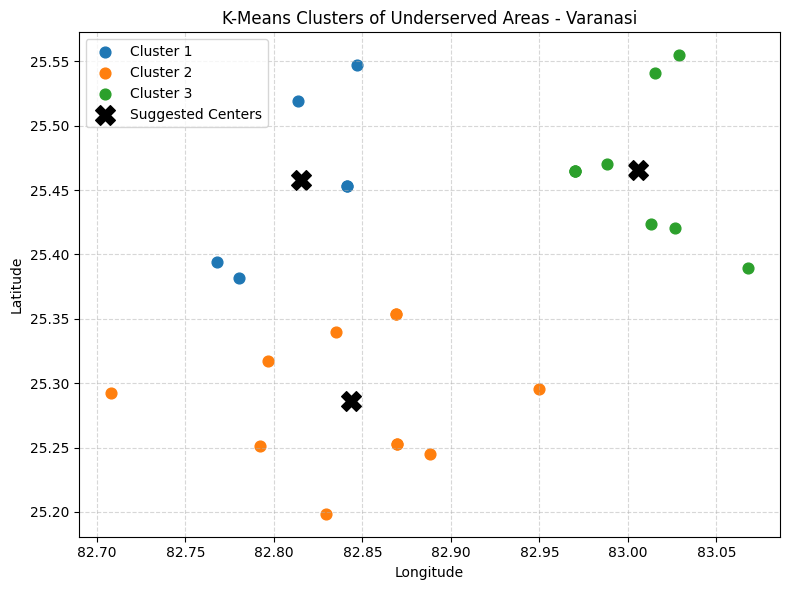

In [41]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load your data
data = pd.read_csv("varanasi_village_priority_with_ntl.csv")
centers = pd.read_csv("varanasi_suggested_centers.csv")

# Filter only high-priority areas
high_need = data[data['Priority_Level'] == '🔴 High Priority'].copy()

# Recreate clusters (3 suggested centers)
kmeans = KMeans(n_clusters=len(centers), random_state=42)
high_need['Cluster'] = kmeans.fit_predict(high_need[['Latitude', 'Longitude']])

# Scatter plot by cluster
plt.figure(figsize=(8,6))
for cluster_id, group in high_need.groupby('Cluster'):
    plt.scatter(group['Longitude'], group['Latitude'], label=f'Cluster {cluster_id+1}', s=60)

# Mark centroids
plt.scatter(centers['Longitude'], centers['Latitude'], c='black', marker='X', s=200, label='Suggested Centers')

plt.title("K-Means Clusters of Underserved Areas - Varanasi")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("varanasi_clusters.png", dpi=300)
plt.show()


 STATIC HEATMAP (for README) - varanasi_heatmap.png

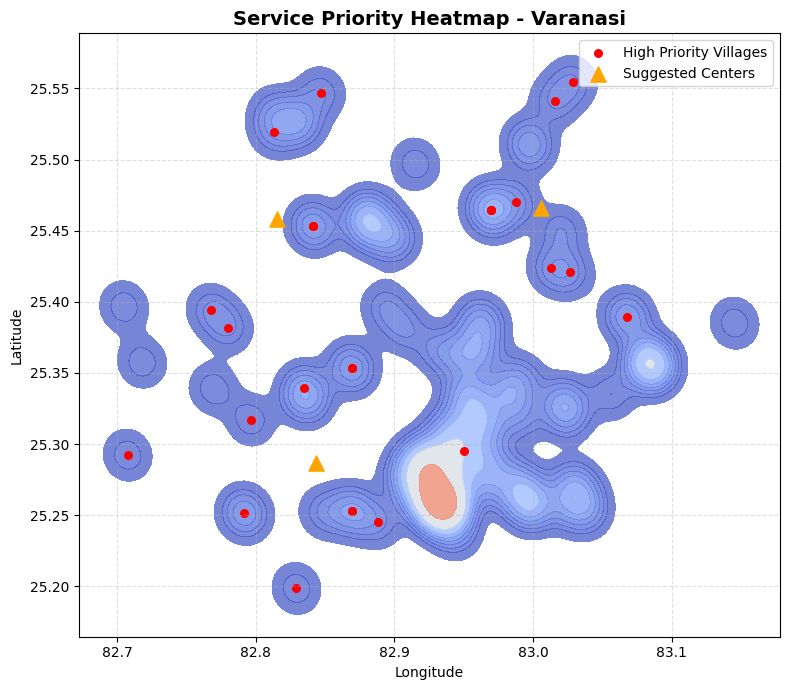

In [36]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your final dataset
data = pd.read_csv("varanasi_village_priority_with_ntl.csv")
centers = pd.read_csv("varanasi_suggested_centers.csv")

# Create figure
plt.figure(figsize=(8,7))

# Plot density-based heat background
sns.kdeplot(
    x=data["Longitude"],
    y=data["Latitude"],
    fill=True,
    cmap="coolwarm",
    bw_adjust=0.3,
    alpha=0.7,
    thresh=0.05
)

# Add red dots for high-priority villages
high_priority = data[data["Priority_Level"] == "🔴 High Priority"]
plt.scatter(high_priority["Longitude"], high_priority["Latitude"],
            color="red", s=30, label="High Priority Villages")

# Add orange house icons for suggested centers
plt.scatter(centers["Longitude"], centers["Latitude"],
            color="orange", s=120, marker="^", label="Suggested Centers")

plt.title("Service Priority Heatmap - Varanasi", fontsize=14, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()

# Save
plt.savefig("varanasi_heatmap.png", dpi=300)
plt.show()
